In [110]:
# import sys
# print(sys.executable)
# print(sys.version)

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import xarray as xr
import datetime

wrf_runs_dir = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/'
nb_dir = !pwd
data_dir_df = pd.read_csv(nb_dir[0]+'/data-dir-j3leswrf.csv', index_col=0)

In [65]:
def plot_c1contour(file, wrf_var, wrf_run):

    wrf_single = Dataset(file, 'r')
    print(wrf_single)

    var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)
#     print(var.shape)
#     print(len(var))
#     print(np.unique(var.values))

    if len(var.dims) > 2: 
        # 1st time step
        var_1time = var[0, :, :]
    else: 
        var_1time = var
    
    if 'bottom_top' in var_1time.dims: 
        var_1time = var_1time[0, :, :]

    lats, lons = wrf.latlon_coords(var)

    bm = wrf.get_basemap(var_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(var.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

    plt.show()
    
def plot_8contour(file, wrf_var, wrf_run):

    wrf_single = Dataset(file, 'r')
    print(wrf_single)

    var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)
#     print(var.shape)
#     print(len(var))
#     print(np.unique(var.values))

    if len(var.dims) > 2: 
        # 1st time step
        var_1time = var[0, :, :]
    else: 
        var_1time = var
    
    if 'bottom_top' in var_1time.dims: 
        var_1time = var_1time[0, :, :]

    lats, lons = wrf.latlon_coords(var)

    bm = wrf.get_basemap(var_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(var.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

    plt.show()

In [84]:
np.arange(16, 24, 1)

array([16, 17, 18, 19, 20, 21, 22, 23])

In [139]:
eval_date = '2018-08-05'
# hr = 20
run = 'mynn'
wrf_var = 'T2'

date_col = data_dir_df[eval_date]

for ind, hr in enumerate(np.arange(16, 24, 1)): 

    file = wrf_runs_dir+date_col[run]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    wrf_single = Dataset(file, 'r')
    var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)
    
    if ind == 0: 
        var_all = var
    else: 
        var_all = xr.concat([var_all, var], dim='Time')

In [140]:
var_all.sel(Time='2018-08-05T16:00')

<xarray.DataArray 'T2' (south_north: 330, west_east: 200)>
array([[307.27353, 307.18173, 307.07147, ..., 307.39188, 307.32596,
        307.27075],
       [307.26636, 307.19232, 307.071  , ..., 307.54968, 307.46854,
        307.34525],
       [307.2564 , 307.17194, 307.06165, ..., 307.66223, 307.56656,
        307.4224 ],
       ...,
       [306.00122, 305.9735 , 305.94043, ..., 307.3726 , 307.5024 ,
        307.5872 ],
       [305.96957, 305.90662, 305.88644, ..., 307.4175 , 307.4838 ,
        307.5495 ],
       [305.96976, 305.8922 , 305.84543, ..., 307.39578, 307.4551 ,
        307.488  ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    float32 1.68e+03
    Time     datetime64[ns] 2018-08-05T16:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [119]:
pd.date_range(start=eval_date+'-16', end=eval_date+'-17', periods=3)

DatetimeIndex(['2018-08-05 16:00:00', '2018-08-05 16:30:00',
               '2018-08-05 17:00:00'],
              dtype='datetime64[ns]', freq=None)

2018-08-05 16:00:00
2018-08-05 17:00:00
2018-08-05 18:00:00
2018-08-05 19:00:00


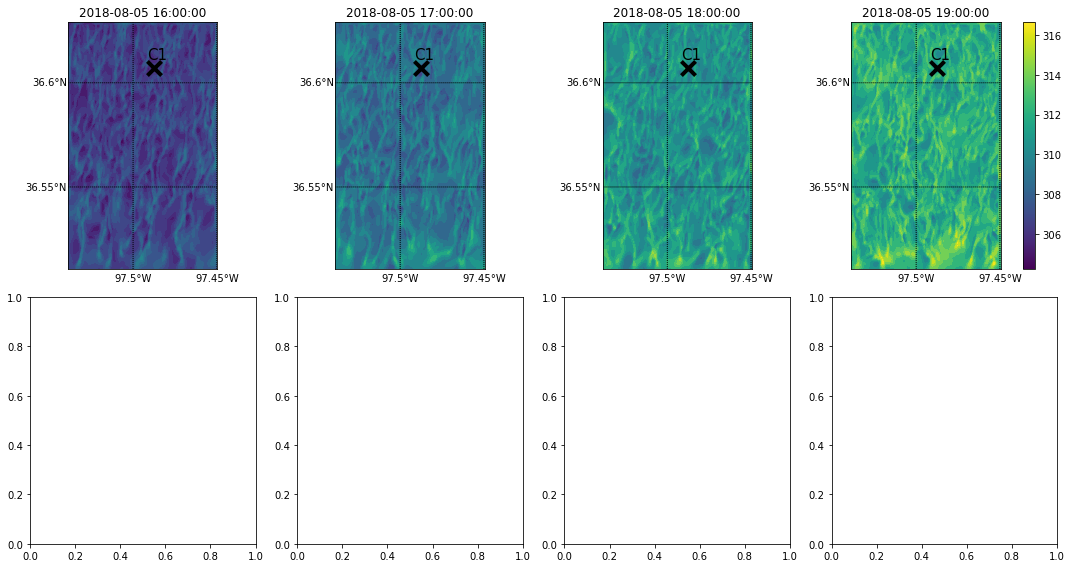

In [205]:
lats, lons = wrf.latlon_coords(var_all)

fig, (axs, axs2) = plt.subplots(2, 4, figsize=(15, 8))

time_list = pd.date_range(start=eval_date+'-16', end=eval_date+'-19', periods=4)

var_subset = var_all.sel(Time=slice(time_list.min(), time_list.max()))
v_min = var_subset.min()
v_max = var_subset.max()

for ind, time in enumerate(time_list):

    print(time)
    var_1time = var_all.sel(Time=time)

    bm = wrf.get_basemap(var_1time, ax=axs[ind])

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))
    
    p = bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'), vmin=v_min, vmax=v_max)
    
    axs[ind].set_title(time)
    
    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4, ax=axs[ind])
    
    c1x, c1y = bm(wrf.to_np(-97.4915), wrf.to_np(36.6115))
    axs[ind].annotate('C1', xy=(c1x, c1y), size=15)
    
# # plt.colorbar(p, orientation='vertical')
# plt.colorbar()

# plt.clim(v_min, v_max)
# cbar = plt.colorbar(p, shrink=0.95)
# cb = plt.colorbar(sc, orientation="horizontal")
# cbar.set_xlim(v_min, v_max)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm.set_array([])
plt.colorbar(sm, ax=axs[3], orientation='vertical', pad=0.1)

# import matplotlib as mpl

# cmap = mpl.cm.viridis

# norm = mpl.colors.Normalize(vmin=v_min, vmax=v_max)

# cb1 = mpl.colorbar.ColorbarBase(p, cmap=cmap,
#                                 norm=norm,
#                                 orientation='horizontal')

# cb1.set_label('Some Units')
# fig.show()

# norm = mpl.colors.BoundaryNorm([v_min, v_max], cmap.N)
# cb3 = mpl.colorbar.ColorbarBase(axs[-1], cmap=cmap,
#                                 boundaries=bounds[10],
#                                 extend='both',
#                                 extendfrac='auto',
#                                 spacing='uniform',
#                                 orientation='horizontal')

# cbar.set_ticks(np.arange(0, 1.1, 0.5))
# cbar.set_ticklabels(['low', 'medium', 'high'])

plt.tight_layout()

plt.show()

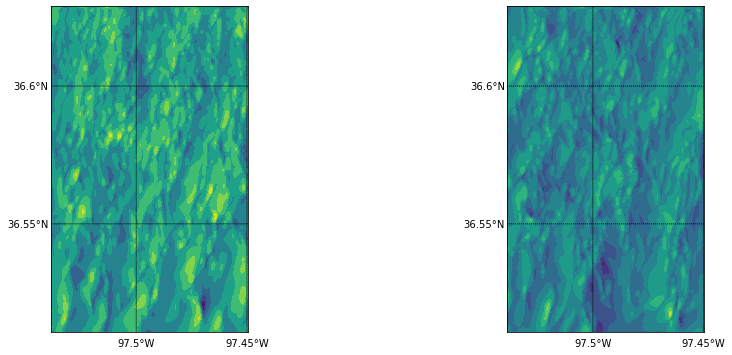

In [97]:
lats, lons = wrf.latlon_coords(var_all)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))



var_1time = var_all.sel(Time='2018-08-05T16:00')

bm = wrf.get_basemap(var_1time, ax=axs[0])

bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

var_1time = var_all.sel(Time='2018-08-05T17:00')

bm = wrf.get_basemap(var_1time, ax=axs[1])

bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))



In [82]:
var = xr.concat([var1, var2], dim='Time')

<xarray.DataArray 'U10' (Time: 12, south_north: 330, west_east: 200)>
array([[[-1.2112596 , -1.3521646 , -1.5685039 , ...,  0.4493091 ,
          0.7344996 ,  0.91562164],
        [-0.6518397 , -0.6811879 , -1.4241633 , ...,  0.4170328 ,
          0.35639262,  0.6394    ],
        [-0.49897987, -0.43510056, -1.3751394 , ...,  0.4065292 ,
          0.39807963,  0.6678339 ],
        ...,
        [ 1.1586778 ,  1.6858627 ,  2.2223258 , ..., -1.4675245 ,
         -1.4657648 , -1.4152924 ],
        [ 1.226413  ,  1.7087102 ,  2.3735204 , ..., -1.5599775 ,
         -1.4496083 , -1.3623753 ],
        [ 1.4627662 ,  1.8943586 ,  2.4838586 , ..., -1.5650835 ,
         -1.5165849 , -1.4657415 ]],

       [[-1.1436036 , -1.2187724 , -1.3673828 , ..., -1.3158476 ,
         -1.3854775 , -1.420412  ],
        [-0.7486698 , -0.76216257, -1.2108462 , ..., -1.1723896 ,
         -0.9712429 , -1.0931265 ],
        [-0.70393157, -0.69072646, -1.1250203 , ..., -1.1124717 ,
         -0.78610224, -0.9489027 ],
...
        [-1.4674764 , -1.4304974 , -1.3176062 , ...,  1.8270078 ,
          1.1407397 , -0.0232819 ],
        [-1.5533793 , -1.4941638 , -1.2482231 , ...,  1.3614502 ,
          0.65253353, -0.38775158],
        [-1.3989425 , -1.3784966 , -1.1570458 , ...,  0.6566539 ,
         -0.27145493, -1.0121562 ]],

       [[-1.8277614 , -1.9975686 , -2.1836865 , ..., -3.2635002 ,
         -3.2998447 , -3.3147576 ],
        [-1.89451   , -2.0425606 , -2.137531  , ..., -3.1842785 ,
         -3.2311215 , -3.2505674 ],
        [-1.919705  , -2.0503573 , -2.0996442 , ..., -3.1570096 ,
         -3.2387853 , -3.2278736 ],
        ...,
        [ 0.4532228 ,  0.7018117 ,  0.632367  , ...,  1.3502797 ,
          0.08027339, -0.48144126],
        [ 0.5056757 ,  0.71287644,  0.45305628, ...,  1.4008594 ,
          0.1450834 , -0.34743422],
        [-0.05207271,  0.18262658,  0.45010185, ...,  1.1525142 ,
          0.90428936,  0.5162557 ]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    (Time) float32 1.92e+03 1.93e+03 1.94e+03 ... 2.02e+03 2.03e+03
  * Time     (Time) datetime64[ns] 2018-08-05T20:00:00 ... 2018-08-05T21:50:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  U at 10 M
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [79]:
var1

<xarray.DataArray 'U10' (Time: 6, south_north: 330, west_east: 200)>
array([[[-1.2112596 , -1.3521646 , -1.5685039 , ...,  0.4493091 ,
          0.7344996 ,  0.91562164],
        [-0.6518397 , -0.6811879 , -1.4241633 , ...,  0.4170328 ,
          0.35639262,  0.6394    ],
        [-0.49897987, -0.43510056, -1.3751394 , ...,  0.4065292 ,
          0.39807963,  0.6678339 ],
        ...,
        [ 1.1586778 ,  1.6858627 ,  2.2223258 , ..., -1.4675245 ,
         -1.4657648 , -1.4152924 ],
        [ 1.226413  ,  1.7087102 ,  2.3735204 , ..., -1.5599775 ,
         -1.4496083 , -1.3623753 ],
        [ 1.4627662 ,  1.8943586 ,  2.4838586 , ..., -1.5650835 ,
         -1.5165849 , -1.4657415 ]],

       [[-1.1436036 , -1.2187724 , -1.3673828 , ..., -1.3158476 ,
         -1.3854775 , -1.420412  ],
        [-0.7486698 , -0.76216257, -1.2108462 , ..., -1.1723896 ,
         -0.9712429 , -1.0931265 ],
        [-0.70393157, -0.69072646, -1.1250203 , ..., -1.1124717 ,
         -0.78610224, -0.9489027 ],
...
        [-1.2036337 , -1.1678342 , -0.40634173, ..., -1.9518205 ,
         -1.5905006 , -1.9989743 ],
        [-1.4574015 , -1.3869756 , -0.5381249 , ..., -2.0904462 ,
         -1.6977143 , -2.00134   ],
        [-1.0258179 , -0.9023671 , -0.63321316, ..., -2.14153   ,
         -2.2992353 , -2.4607038 ]],

       [[-2.7258239 , -2.785266  , -2.8174996 , ..., -1.8949103 ,
         -1.7192972 , -1.6068351 ],
        [-1.7937825 , -1.7740121 , -2.614542  , ..., -1.7632241 ,
         -0.98594713, -0.94881713],
        [-1.7634652 , -1.7491103 , -2.4543514 , ..., -1.7836248 ,
         -1.7361209 , -1.626718  ],
        ...,
        [ 1.0518512 ,  0.818915  ,  0.36982077, ...,  0.26181608,
          0.9237711 ,  0.21607888],
        [ 1.1712229 ,  0.91784686,  0.23042564, ...,  0.03759275,
          0.8454967 ,  0.21783829],
        [ 0.7507629 ,  0.39615747, -0.02739905, ..., -0.5765238 ,
         -0.7974849 , -1.1104035 ]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    (Time) float32 1.92e+03 1.93e+03 1.94e+03 ... 1.96e+03 1.97e+03
  * Time     (Time) datetime64[ns] 2018-08-05T20:00:00 ... 2018-08-05T20:50:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  U at 10 M
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

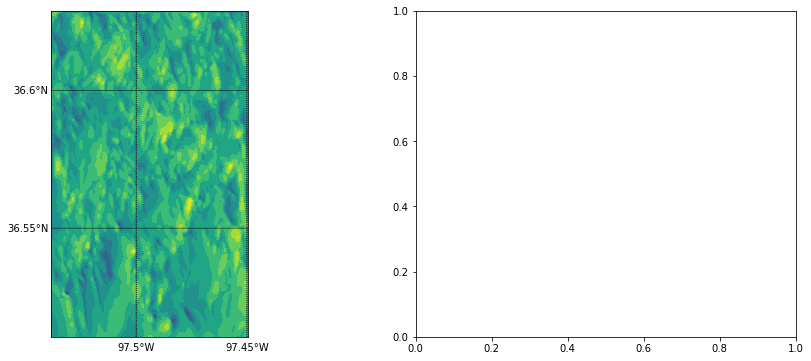

In [72]:
eval_date = '2018-08-05'
hr = 20
run = 'mynn'

date_col = data_dir_df[eval_date]
file = wrf_runs_dir+date_col[run]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
# plot_c1contour(file, 'WP_SUM', row)

wrf_var = 'U10'

wrf_single = Dataset(file, 'r')

var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)

if len(var.dims) > 2: 
    # 1st time step
    var_1time = var[0, :, :]
else: 
    var_1time = var

if 'bottom_top' in var_1time.dims: 
    var_1time = var_1time[0, :, :]

lats, lons = wrf.latlon_coords(var)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

bm = wrf.get_basemap(var_1time, ax=axs[0])

bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

# clb = axs[0].colorbar(shrink=0.9)
# clb.axs[0].set_title(var.units, pad=12)

# c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
# bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

# c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
# plt.annotate('C1', xy=(c1x, c1y), size=15)

# plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

plt.show()

In [74]:
var_1time

<xarray.DataArray 'U10' (south_north: 330, west_east: 200)>
array([[-1.2112596 , -1.3521646 , -1.5685039 , ...,  0.4493091 ,
         0.7344996 ,  0.91562164],
       [-0.6518397 , -0.6811879 , -1.4241633 , ...,  0.4170328 ,
         0.35639262,  0.6394    ],
       [-0.49897987, -0.43510056, -1.3751394 , ...,  0.4065292 ,
         0.39807963,  0.6678339 ],
       ...,
       [ 1.1586778 ,  1.6858627 ,  2.2223258 , ..., -1.4675245 ,
        -1.4657648 , -1.4152924 ],
       [ 1.226413  ,  1.7087102 ,  2.3735204 , ..., -1.5599775 ,
        -1.4496083 , -1.3623753 ],
       [ 1.4627662 ,  1.8943586 ,  2.4838586 , ..., -1.5650835 ,
        -1.5165849 , -1.4657415 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    float32 1.92e+03
    Time     datetime64[ns] 2018-08-05T20:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  U at 10 M
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [63]:
eval_date = '2018-08-05'
hr = 20
run = 'mynn'
# row = 'mynn_d12-9s_d34-1s_lu'
date_col = data_dir_df[eval_date]
# file = wrf_runs_dir+date_col[row]+'/wrfout_d04_'+eval_date+'_'+str(hr)+':00:00'
file = wrf_runs_dir+date_col[run]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
plot_c1contour(file, 'WP_SUM', row)
# CLDFRAC2D -- 2-D MAX CLOUD FRACTION

# wrf_single = Dataset(file, 'r')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE: 2018-08-05_15:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    US

ValueError: 'WP_SUM' is not a valid variable name

In [45]:
var = wrf.getvar(wrf_single, 'WP_SUM', timeidx=wrf.ALL_TIMES)

[10. 12. 14.]


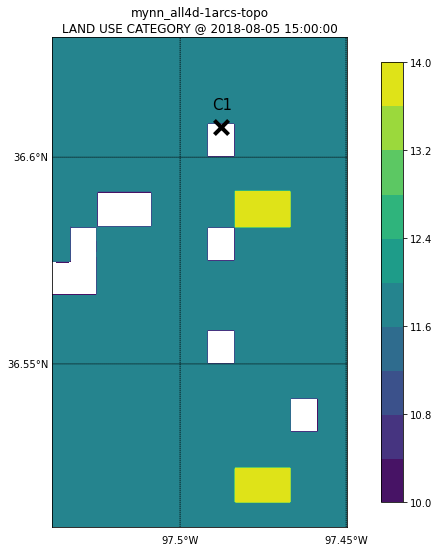

[17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]


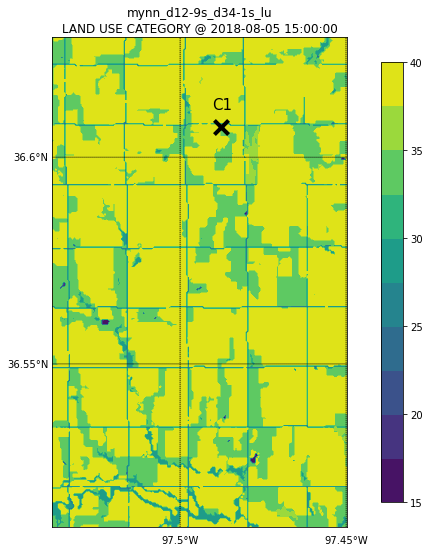

[17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]


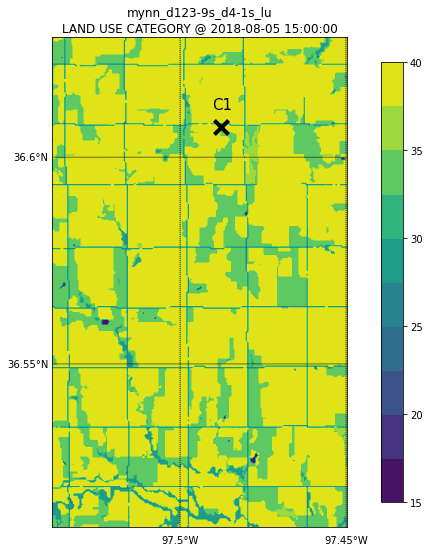

[ 1. 17. 23. 24. 25. 28. 29. 33. 37. 38.]


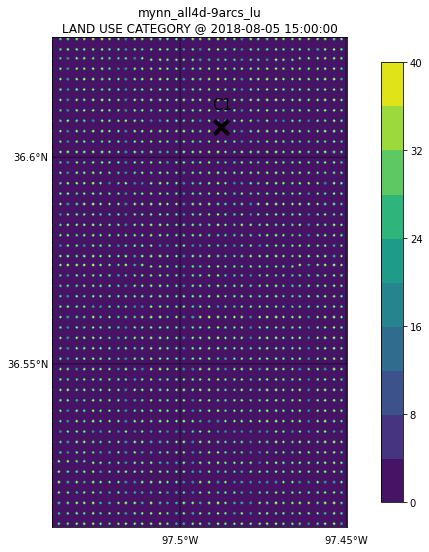

In [16]:
eval_date = '2018-08-05'
# hr = 20
for row in ['mynn_all4d-1arcs-topo', 'mynn_d12-9s_d34-1s_lu', 'mynn_d123-9s_d4-1s_lu', 'mynn_all4d-9arcs_lu']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/wrfinput_d04'
    plot_c1contour(file, 'LU_INDEX', row)
    # CLDFRAC2D

In [10]:
data_dir_df

,2018-08-05,2018-09-01
mynn,l1_0805m,l3_0901m
mynn_ck0.1,l7_0805m-ck,NaN
edmf,l2_0805e,l4_0901e
mynn_all4d-1arcs-topo,l5_0805m,NaN
mynn_d12-9s_d34-1s_lu,n1_d12-9s_d34-1s,NaN
mynn_d123-9s_d4-1s_lu,n2_d123-9s_d4-1s,NaN
mynn_all4d-9arcs_lu,n3_9s,NaN
wrf_start,8/4/18 12:00,8/31/18 12:00


In [ ]:
'/projects/mmcpnnl/jlee/wrf-mmc/sgp/l5_0805m/'+'wrfinput_d04'

In [ ]:
'mynn_all4d-1arcs-topo', 'mynn_d12-9s_d34-1s_lu', 'mynn_d123-9s_d4-1s_lu', 'mynn_all4d-9arcs_lu'

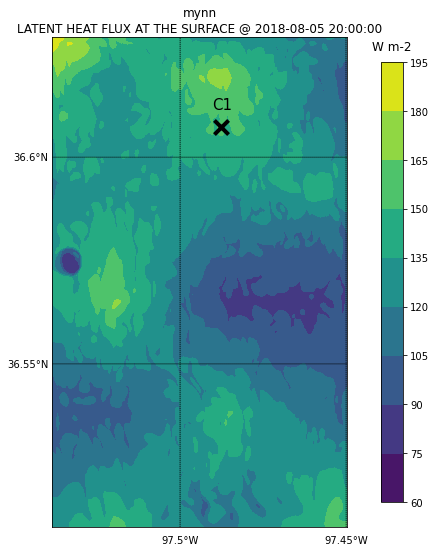

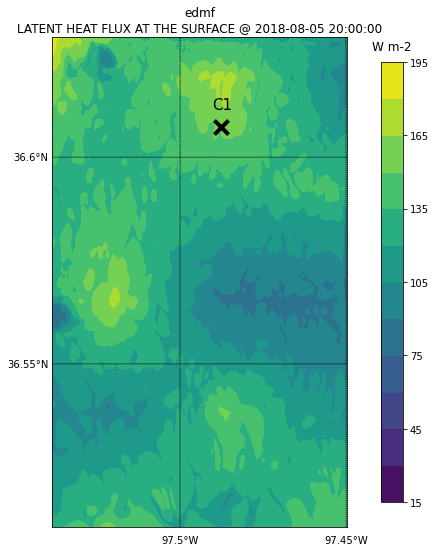

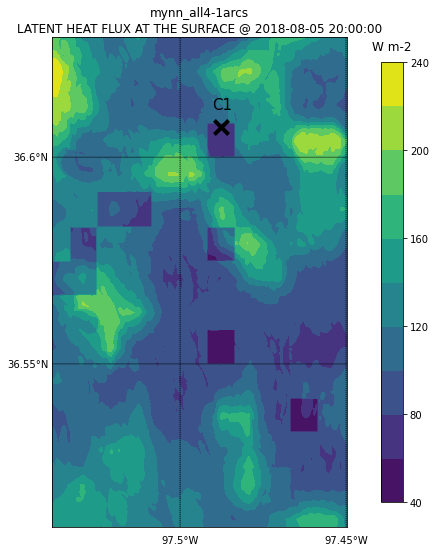

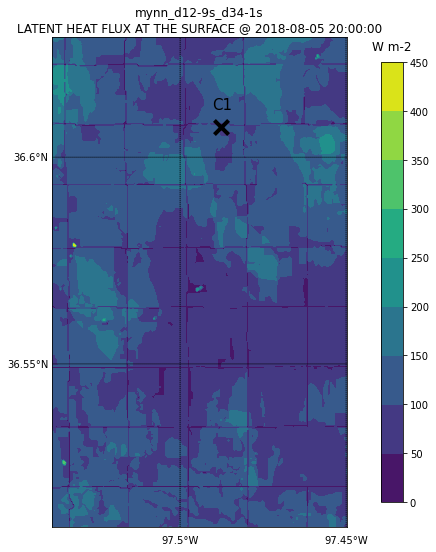

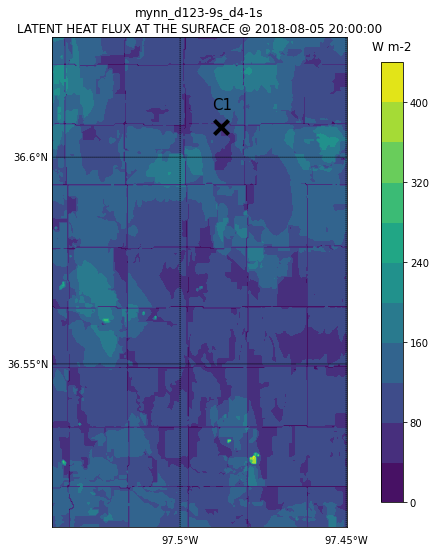

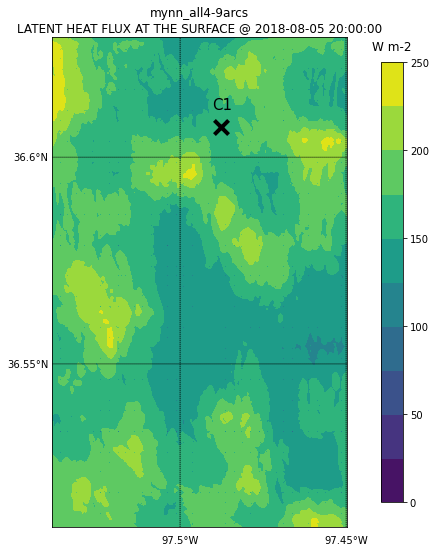

In [6]:
eval_date = '2018-08-05'
hr = 20
for row in ['mynn', 'edmf', 'mynn_all4-1arcs', 'mynn_d12-9s_d34-1s', 
            'mynn_d123-9s_d4-1s', 'mynn_all4-9arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/wrfout_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)
    # CLDFRAC2D

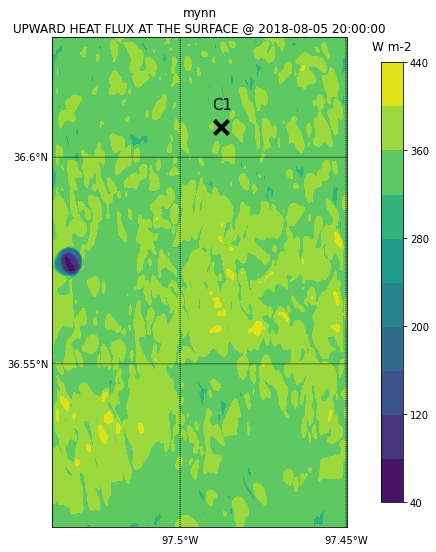

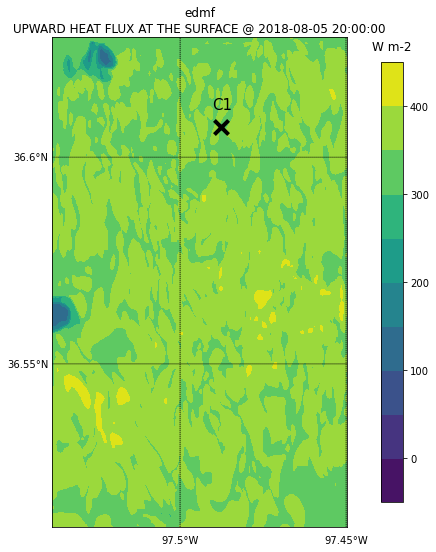

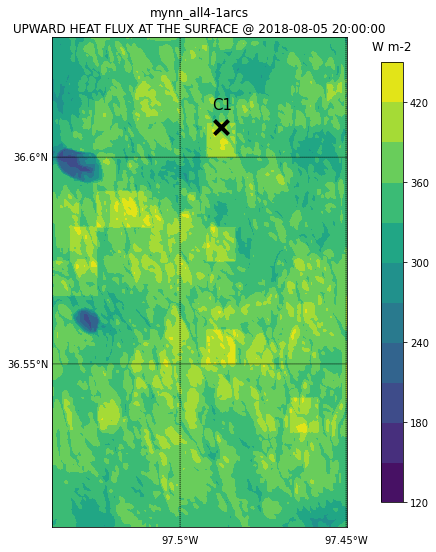

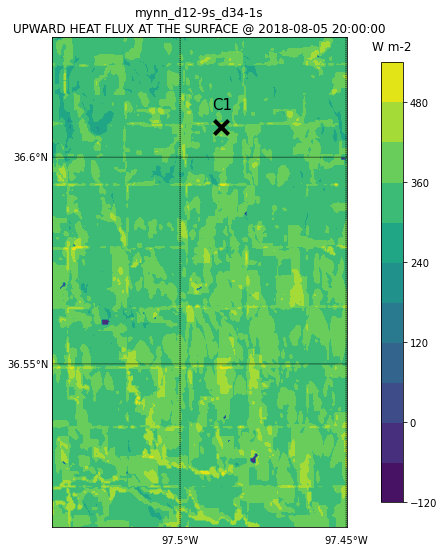

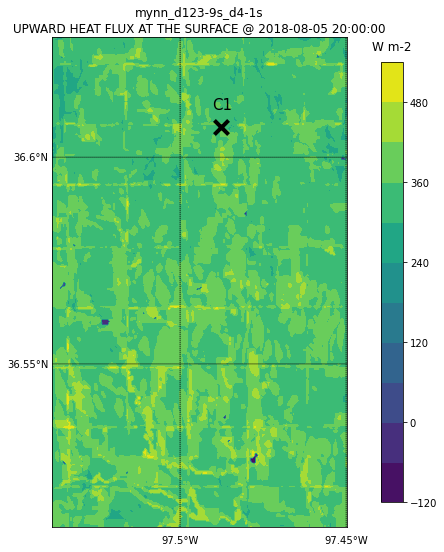

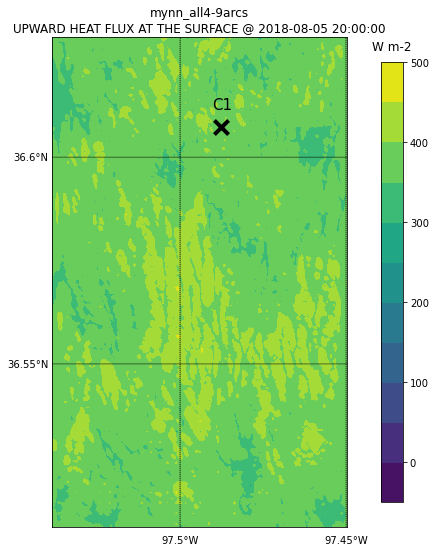

In [5]:
eval_date = '2018-08-05'
hr = 20
for row in ['mynn', 'edmf', 'mynn_all4-1arcs', 'mynn_d12-9s_d34-1s', 
            'mynn_d123-9s_d4-1s', 'mynn_all4-9arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/wrfout_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'HFX', row)

In [11]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/wrfout_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'VEGFRA', row)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE: 2018-08-05_15:00:00
    SIMULATION_START_DATE: 2018-08-04_12:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
 

ValueError: 'VEGFRA' is not a valid variable name

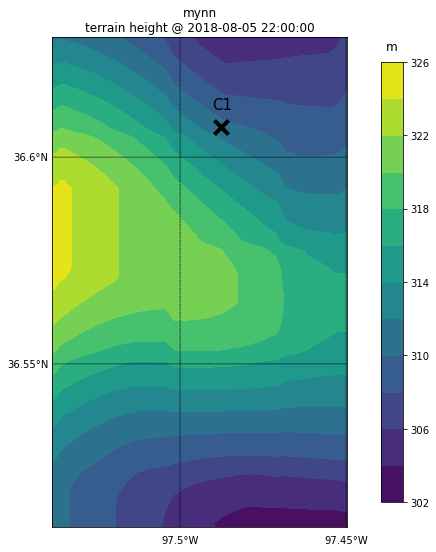

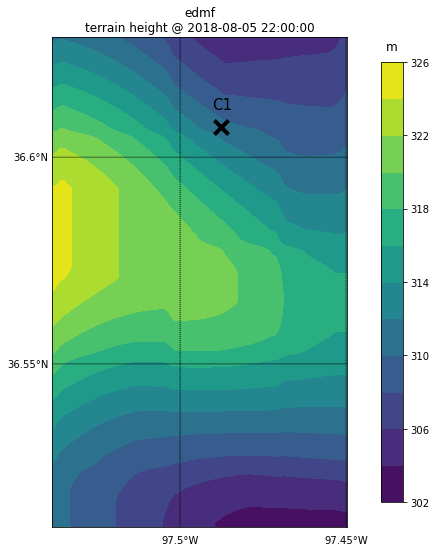

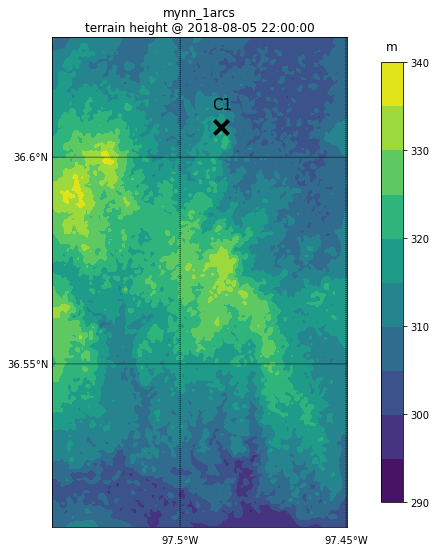

In [6]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'ter', row)

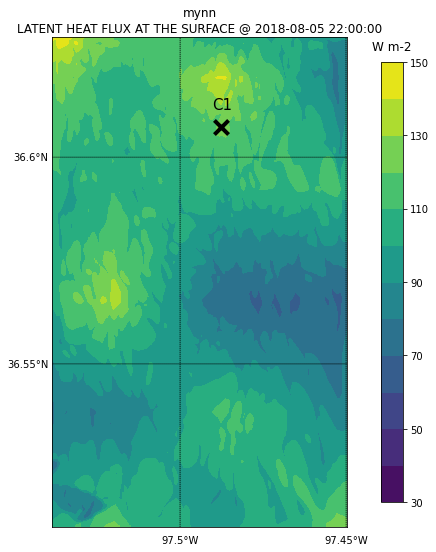

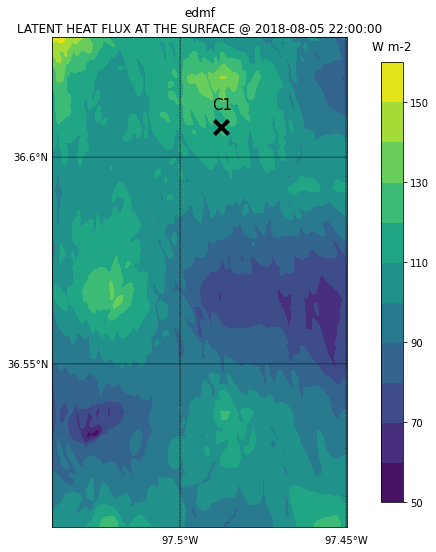

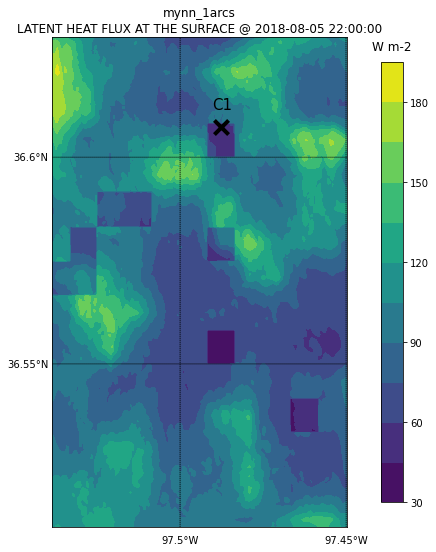

In [7]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)

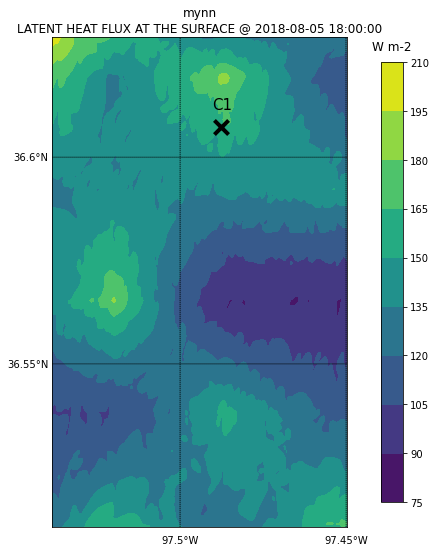

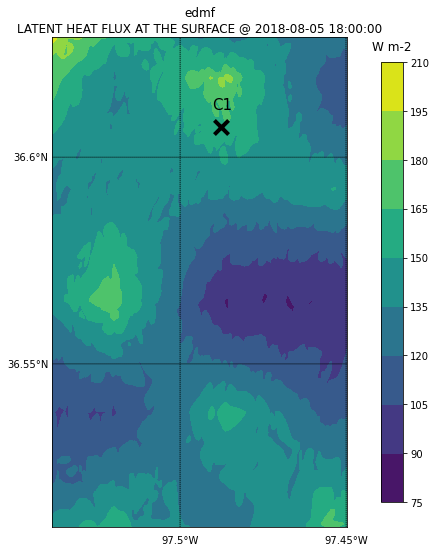

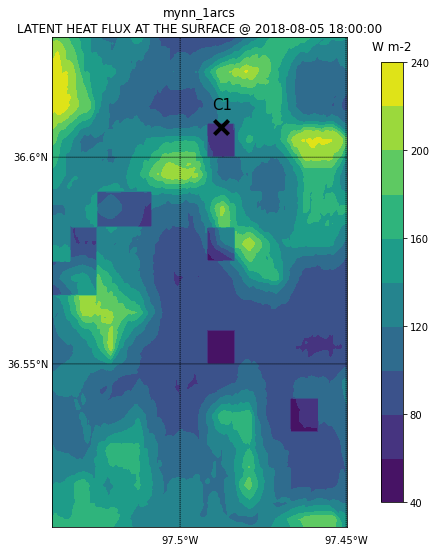

In [71]:
hr = 18
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)

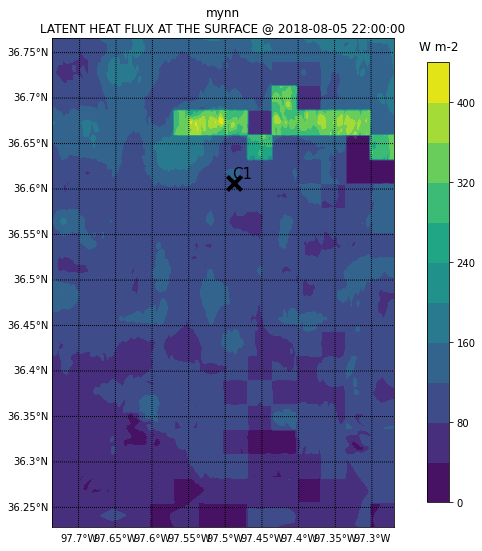

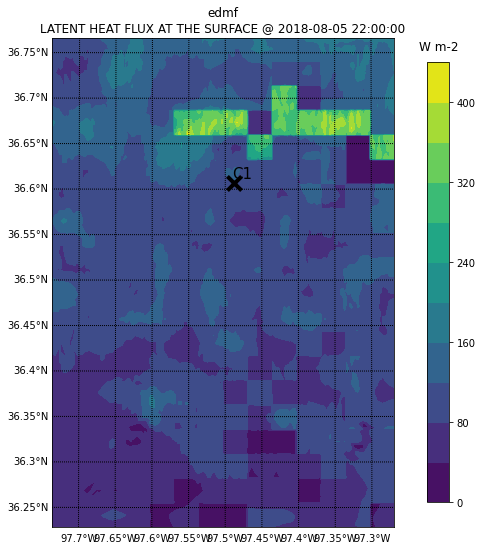

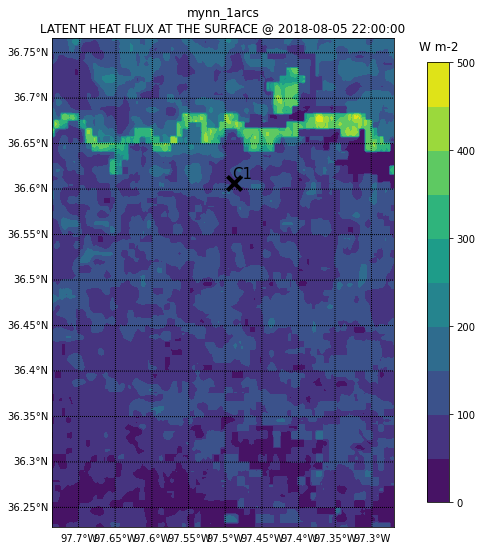

In [69]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d03_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)

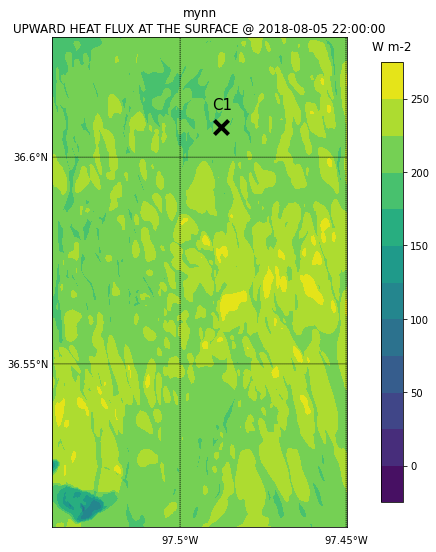

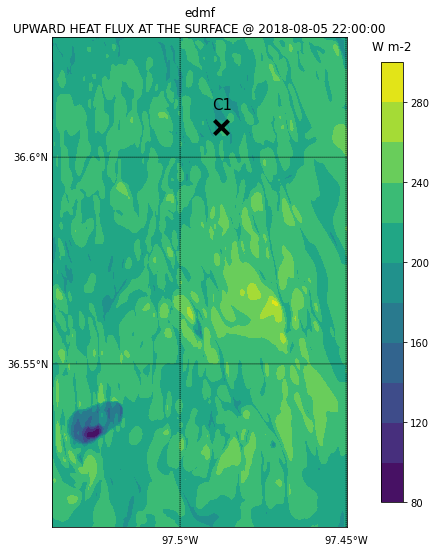

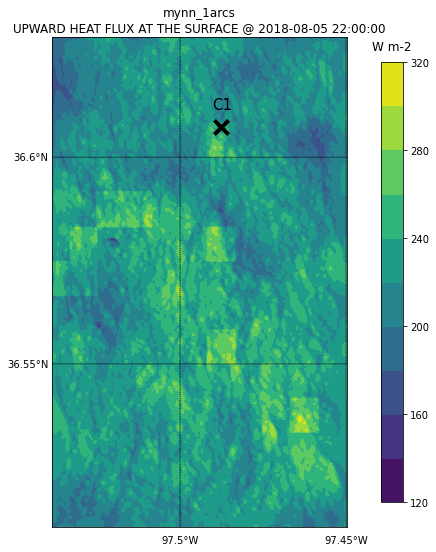

In [8]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'HFX', row)

In [67]:
def plot_c1contour_wswd1height(file, wrf_var, wrf_run, hgt_ind):

    wrf_single = Dataset(file, 'r')
    
    hgt = wrf.getvar(wrf_single, 'height_agl', timeidx=wrf.ALL_TIMES)
    hgt_avg = hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[hgt_ind]

    var = wrf.getvar(wrf_single, 'wspd_wdir', timeidx=wrf.ALL_TIMES)
    
    var = var['wspd_wdir' == wrf_var]
    var_1time = var[0, hgt_ind, :, :]

    lats, lons = wrf.latlon_coords(var)

    bm = wrf.get_basemap(var_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(var.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(wrf_run+': '+wrf_var+'\n'+str(pd.Timestamp(var_1time['Time'].values))
              +' @ '+str(np.round(hgt_avg.values, 1))+' m agl')

    plt.show()

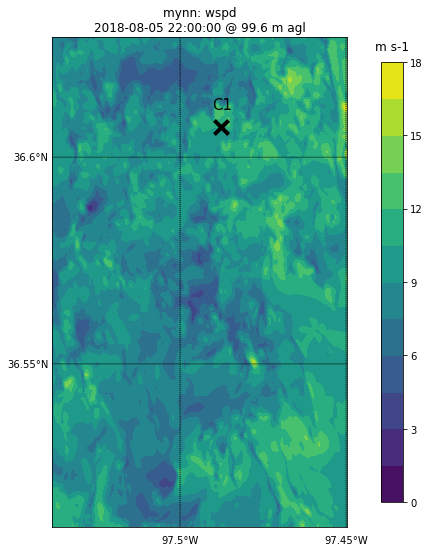

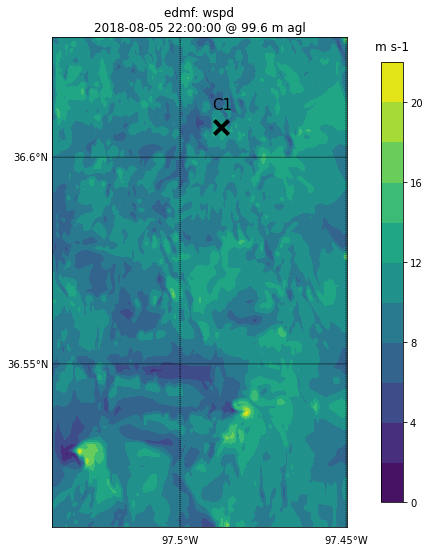

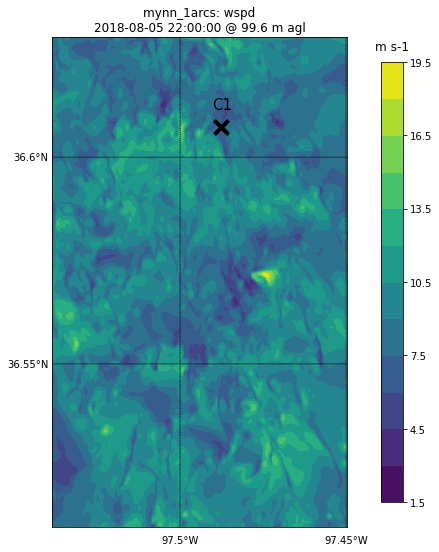

In [68]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour_wswd1height(file, 'wspd', row, 20)

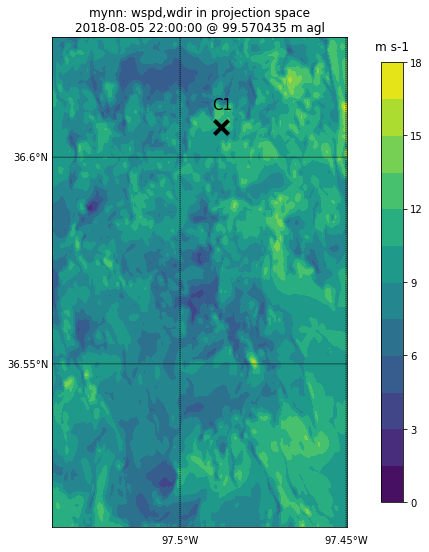

In [59]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'
plot_c1contour_wswd1height(file, 'mynn', 20)

In [4]:
# file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'
# file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/'+'wrfout_d04_2018-08-05_22:00:00'
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l5_0805m/'+'wrfinput_d04'
wrf_single = Dataset(file, 'r')

In [5]:
wrf_single

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM REAL_EM V4.2.1 PREPROCESSOR
    START_DATE: 2018-08-05_15:00:00
    SIMULATION_START_DATE: 2018-08-05_15:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTER

In [6]:
lu = wrf.getvar(wrf_single, 'LU_INDEX', timeidx=wrf.ALL_TIMES)

In [83]:
lu

<xarray.DataArray 'LU_INDEX' (south_north: 330, west_east: 200)>
array([[12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    Time     datetime64[ns] 2018-08-05T15:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND USE CATEGORY
    units:        
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [91]:
np.unique(lu.values)
# 10 = 'Grasslands'
# 12 = 'Croplands'
# 14 = 'cropland/natural vegetation mosaic'

array([10., 12., 14.], dtype=float32)

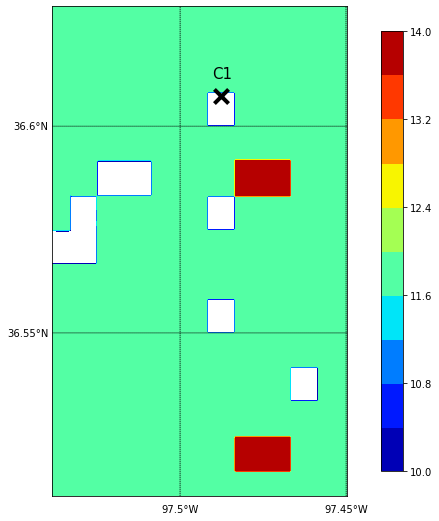

In [87]:
lats, lons = wrf.latlon_coords(lu)

bm = wrf.get_basemap(lu)

fig = plt.figure(figsize=(12, 9))

# bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

# bm.contour(x, y, wrf.to_np(var), 10, colors="black")
bm.contourf(x, y, wrf.to_np(lu), 10, cmap=get_cmap('jet'))

clb = plt.colorbar(shrink=0.9)
# clb.ax.set_title(var.units, pad=12)

c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
plt.annotate('C1', xy=(c1x, c1y), size=15)

# plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

plt.show()

In [35]:
wswd = wrf.getvar(wrf_single, 'wspd_wdir', timeidx=wrf.ALL_TIMES)

In [42]:
hgt = wrf.getvar(wrf_single, 'height_agl', timeidx=wrf.ALL_TIMES)
hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[20]

In [60]:
hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[20]

<xarray.DataArray 'height_agl' ()>
array(99.570435, dtype=float32)
Coordinates:
    XTIME    float32 2.04e+03
    Time     datetime64[ns] 2018-08-05T22:00:00

In [63]:
np.round(hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[20].values, 2)

99.57

In [41]:
wswd['wspd_wdir' == 'wspd']

<xarray.DataArray 'wspd_wdir' (Time: 6, bottom_top: 108, south_north: 330, west_east: 200)>
array([[[[ 3.8705356,  3.5498264,  3.729425 , ...,  4.7248354,
           4.4430456,  4.2976847],
         [ 3.8588343,  3.2310677,  3.4014912, ...,  4.7480655,
           4.5012026,  4.357338 ],
         [ 3.7952995,  3.5067756,  3.5702975, ...,  4.3574166,
           4.3924837,  4.391114 ],
         ...,
         [ 2.3575618,  2.079645 ,  1.9269799, ...,  2.4190388,
           2.3493588,  2.4383967],
         [ 2.4332314,  2.1602144,  2.1008415, ...,  2.5374248,
           2.4348478,  2.4640281],
         [ 2.5108907,  2.2227943,  2.1367476, ...,  2.6976538,
           2.6138754,  2.5917037]],

        [[ 5.0415707,  5.1741095,  5.779689 , ...,  5.9150305,
           5.837965 ,  5.689294 ],
         [ 5.045551 ,  5.047611 ,  5.798314 , ...,  5.998372 ,
           5.9134736,  5.7033443],
         [ 5.039332 ,  4.992896 ,  5.3318777, ...,  5.8880944,
           5.8644705,  5.7472634],
...
         [10.214731 , 10.213899 , 10.211783 , ..., 10.008541 ,
          10.009336 , 10.008082 ],
         [10.216851 , 10.216206 , 10.213971 , ..., 10.009813 ,
          10.009584 , 10.008396 ],
         [10.2170925, 10.215658 , 10.214306 , ..., 10.010242 ,
          10.009451 , 10.0090275]],

        [[14.585283 , 14.591129 , 14.591405 , ..., 14.786691 ,
          14.785126 , 14.785245 ],
         [14.580567 , 14.586523 , 14.585622 , ..., 14.786879 ,
          14.785698 , 14.786548 ],
         [14.577897 , 14.579668 , 14.581297 , ..., 14.786846 ,
          14.785121 , 14.785958 ],
         ...,
         [13.975302 , 13.97202  , 13.972725 , ..., 14.392135 ,
          14.395523 , 14.402635 ],
         [13.978477 , 13.977462 , 13.976943 , ..., 14.389719 ,
          14.388475 , 14.401385 ],
         [13.9753685, 13.975112 , 13.975655 , ..., 14.395387 ,
          14.393958 , 14.401071 ]]]], dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XLONG      (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT       (south_north, west_east) float32 36.51 36.51 ... 36.63 36.63
    XTIME      (Time) float32 2.04e+03 2.05e+03 2.06e+03 ... 2.08e+03 2.09e+03
  * Time       (Time) datetime64[ns] 2018-08-05T22:00:00 ... 2018-08-05T22:50:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  wspd,wdir in projection space
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

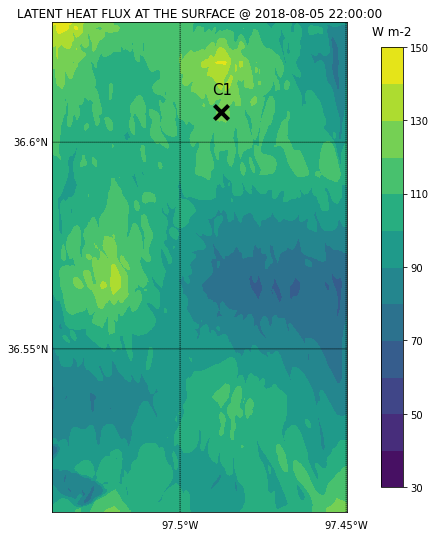

In [118]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'

def plot_contour(file, var, ):

    wrf_single = Dataset(file, 'r')

    lh = wrf.getvar(wrf_single, 'LH', timeidx=wrf.ALL_TIMES)

    # 1st time step
    lh_1time = lh[0,:,:]

    lats, lons = wrf.latlon_coords(lh)

    bm = wrf.get_basemap(lh_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(lh), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(lh_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(lh.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(lh_1time.description+' @ '+str(pd.Timestamp(lh_1time['Time'].values)))

    plt.show()